# Housing data analysis 

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

from scipy.interpolate import griddata
from scipy.stats import alpha

## Load housing data

- Download housing data
- Extract the file and save as csv
- return the csv file

In [2]:
def load_housing_data():
    tarball_path = Path('../datasets/housing.tgz')
    if not tarball_path.is_file():
        Path('../datasets').mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path='../datasets')
    return pd.read_csv(Path('../datasets/housing/housing.csv'))

In [3]:
housing = load_housing_data()

> List of columns and its data types


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


> statistical output of the data


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


> Plot the graph for the data

In [6]:
import matplotlib.pyplot as plt

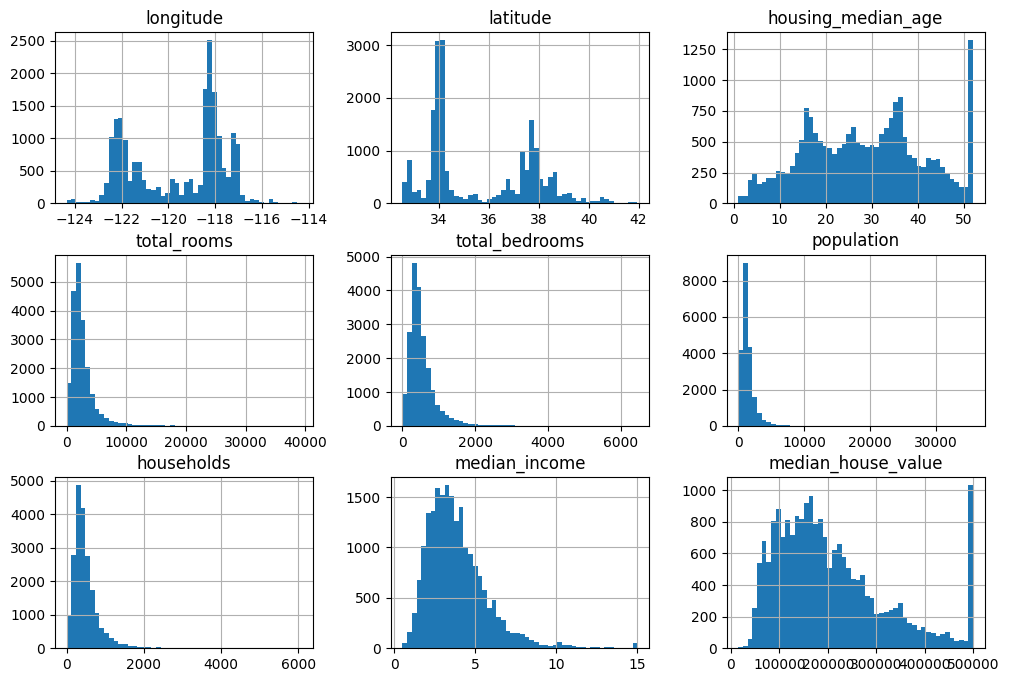

In [7]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()

> Splitting data between test and training set

In [8]:
import numpy as np


def suffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_data_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_data_size]
    train_indices = shuffled_indices[test_data_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [9]:
train_set, test_set = suffle_and_split_data(housing, test_ratio=0.2)

In [10]:
len(train_set)

16512

In [11]:
len(test_set)

4128

> Unique Identifier

In [12]:
from zlib import crc32

In [13]:
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2 ** 32

In [14]:
def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

> Have a look at train_test_split() in Scikit-Learn


In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

> Visualize

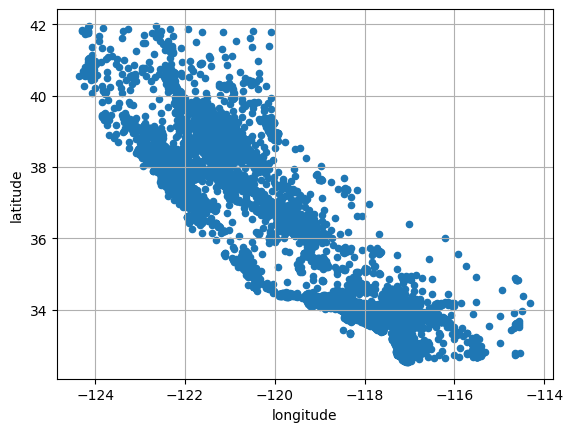

In [16]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

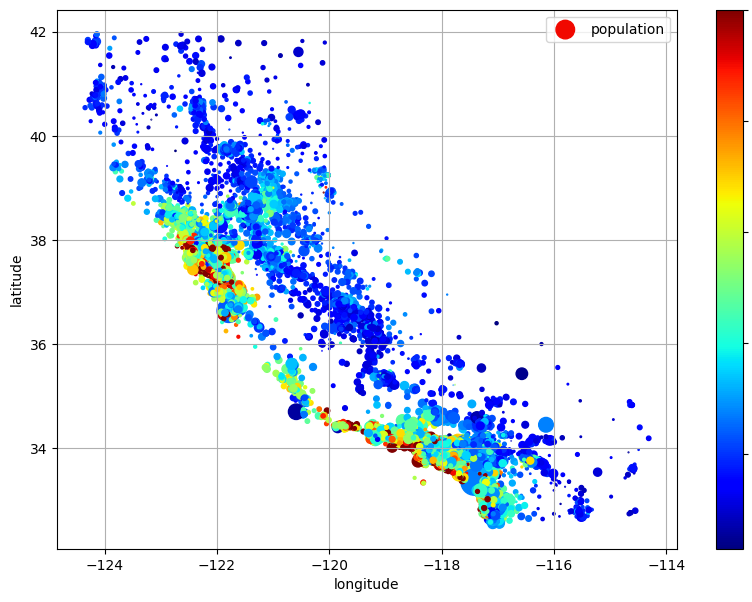

In [17]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True, s=housing['population'] / 100, label='population',
             c='median_house_value', cmap='jet', colorbar=True, legend=True, sharex=False, sharey=True, figsize=(10, 7))

In [18]:
plt.show()

> Looking for Correlations

In [19]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

> Plotting all the Correlations

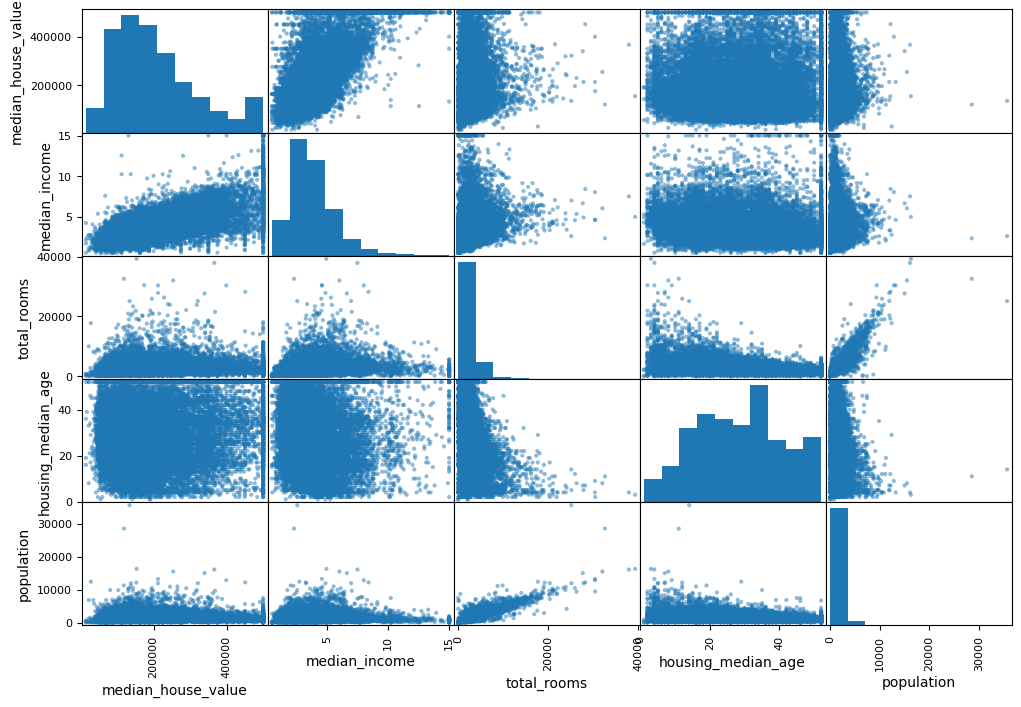

In [20]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age', 'population']
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

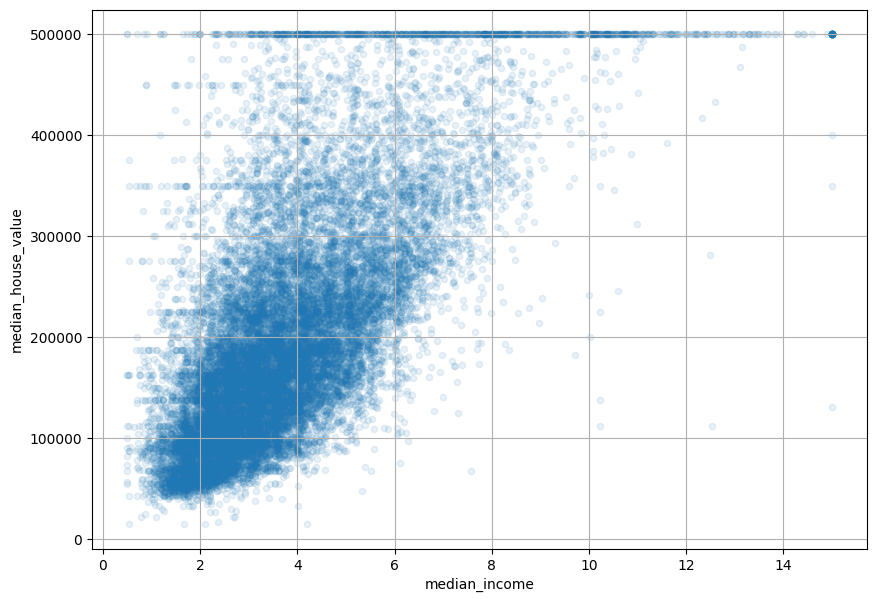

In [21]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1, grid=True, figsize=(10, 7))
plt.show()